In [1]:
from pyuba.uba import PyUba

uba = PyUba()

x_data = [1, 3, 7, 14, 30, 60, 90, 180]
y_data = [80, 70, 55, 50, 30, 22, 10, 8]
facebook = uba.create_profile(days=x_data, retention_values=y_data)
facebook

{'x': [1, 3, 7, 14, 30, 60, 90, 180],
 'y': [80, 70, 55, 50, 30, 22, 10, 8],
 'y_collapsed': [80.0, 70.0, 55.0, 50.0, 30.0, 22.0, 10.0, 8.0],
 'x_collapsed': [1, 3, 7, 14, 30, 60, 90, 180],
 'interpolation_f': <scipy.interpolate.interpolate.interp1d at 0x7fc81ba97950>,
 'interpolation_s': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline at 0x7fc81bda06d0>,
 'params': {'log': array([11.69432981,  0.85932489, 91.18858849]),
  'exp': array([6.81055508e+01, 4.01937193e-02, 1.00786301e+01]),
  'linear': array([-0.36314103, 58.10116222]),
  'quad': array([ 4.23356783e-03, -1.09641452e+00,  6.94411850e+01]),
  'weibull': array([136.70664663,   0.99893803]),
  'power': array([88.3002565,  0.3123284])},
 'errors': {'log': 61.1068291195336,
  'exp': 101.38898241406785,
  'linear': 1412.367783723572,
  'quad': 364.49321231183075,
  'weibull': 12824.82253493541,
  'power': 440.6176923037875},
 'best_fit': 'log',
 'retention_profile': 'best_fit',
 'retention_projection': (array([  1,   2,  

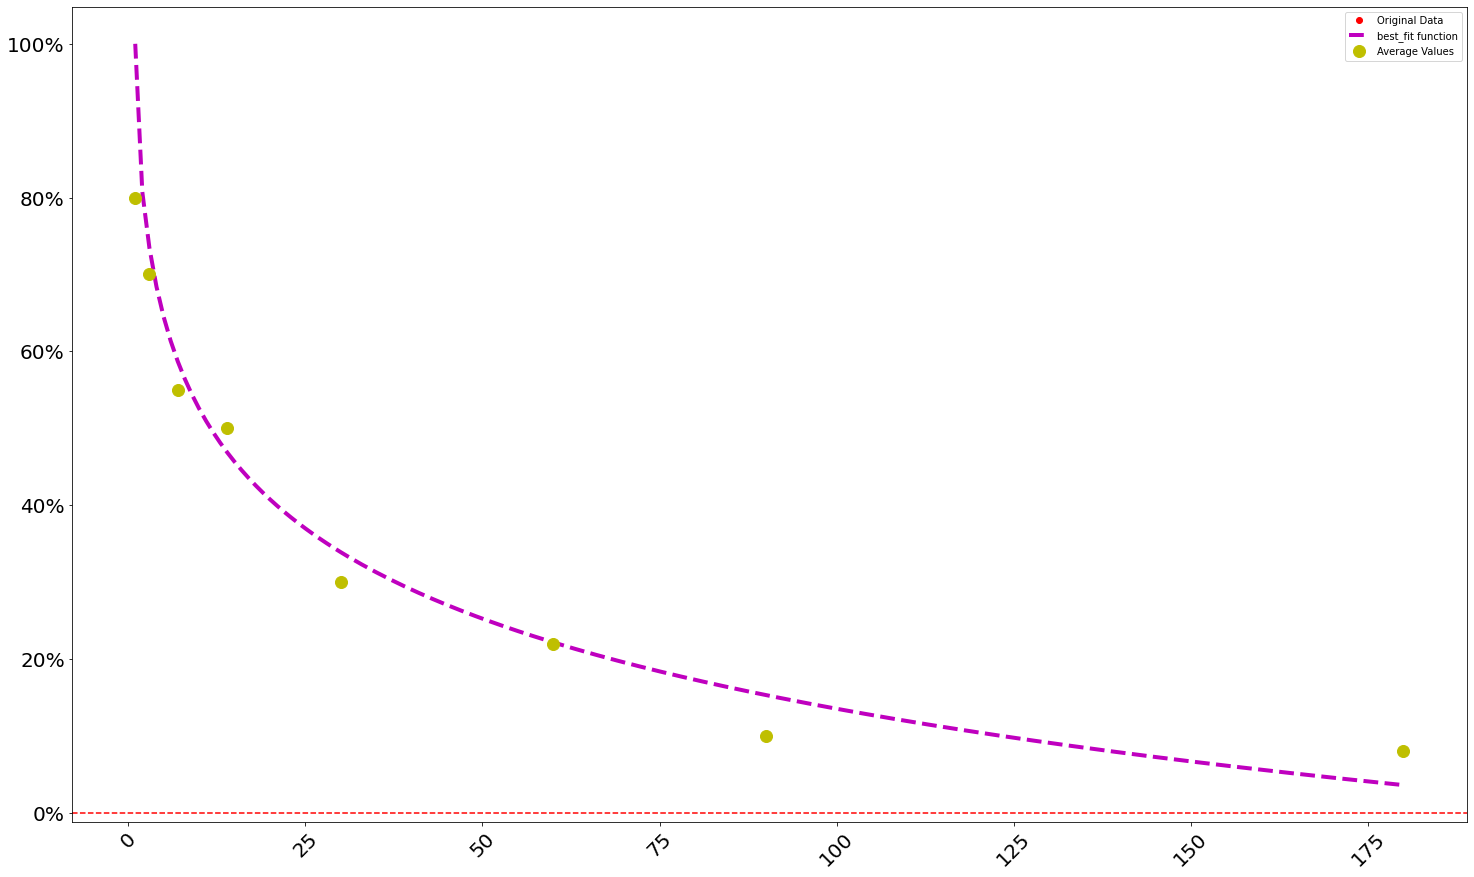

In [2]:
uba.plot_retention(facebook)

In [3]:
cohorts = [1000, 1000, 1000, 1000, 1000]

facebook_dau = uba.project_cohorted_DAU(
    profile=facebook, periods=50, cohorts=cohorts, start_date=1
)

facebook_dau

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
cohort_date,,,,,,,,,,,,,,,,,,,,,
1,1000,807,734,684,645,613,587,564,543,525,...,285,281,277,273,270,266,262,259,255,252
2,0,1000,807,734,684,645,613,587,564,543,...,290,285,281,277,273,270,266,262,259,255
3,0,0,1000,807,734,684,645,613,587,564,...,294,290,285,281,277,273,270,266,262,259
4,0,0,0,1000,807,734,684,645,613,587,...,298,294,290,285,281,277,273,270,266,262
5,0,0,0,0,1000,807,734,684,645,613,...,303,298,294,290,285,281,277,273,270,266


In [4]:
facebook_total = uba.DAU_total(facebook_dau)
facebook_total

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Value,,,,,,,,,,,,,,,,,,,,,
DAU,1000,1807,2541,3225,3870,3483,3263,3093,2952,2832,...,1470,1448,1427,1406,1386,1367,1348,1330,1312,1294


In [5]:
facebook_DAU = uba.project_cohorted_DAU(
    profile=facebook,
    periods=50,
    cohorts=cohorts,
    DAU_target=10000,
    DAU_target_timeline=10,
    start_date=1,
)

facebook_DAU.iloc[:, ::-1]

,50,49,48,47,46,45,44,43,42,41,...,10,9,8,7,6,5,4,3,2,1
cohort_date,,,,,,,,,,,,,,,,,,,,,
1,252,255,259,262,266,270,273,277,281,285,...,525,543,564,587,613,645,684,734,807,1000
2,255,259,262,266,270,273,277,281,285,290,...,543,564,587,613,645,684,734,807,1000,0
3,259,262,266,270,273,277,281,285,290,294,...,564,587,613,645,684,734,807,1000,0,0
4,262,266,270,273,277,281,285,290,294,298,...,587,613,645,684,734,807,1000,0,0,0
5,266,270,273,277,281,285,290,294,298,303,...,613,645,684,734,807,1000,0,0,0,0
6,435,441,448,454,461,467,474,481,489,496,...,1040,1103,1184,1302,1613,0,0,0,0,0
7,481,488,495,502,509,517,524,532,541,549,...,1201,1290,1418,1757,0,0,0,0,0,0
8,514,522,529,537,545,553,562,570,579,588,...,1361,1495,1853,0,0,0,0,0,0,0
9,545,553,561,569,577,586,595,604,614,624,...,1561,1934,0,0,0,0,0,0,0,0


In [6]:
#get DNU from a DAU projection
facebook_DNU = uba.get_DNU(facebook_DAU)
facebook_DNU

,cohort_date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Value,,,,,,,,,,,,,,,,,,,,,
DNU,1000,1000.0,1000.0,1000.0,1000.0,1613.0,1757.0,1853.0,1934.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


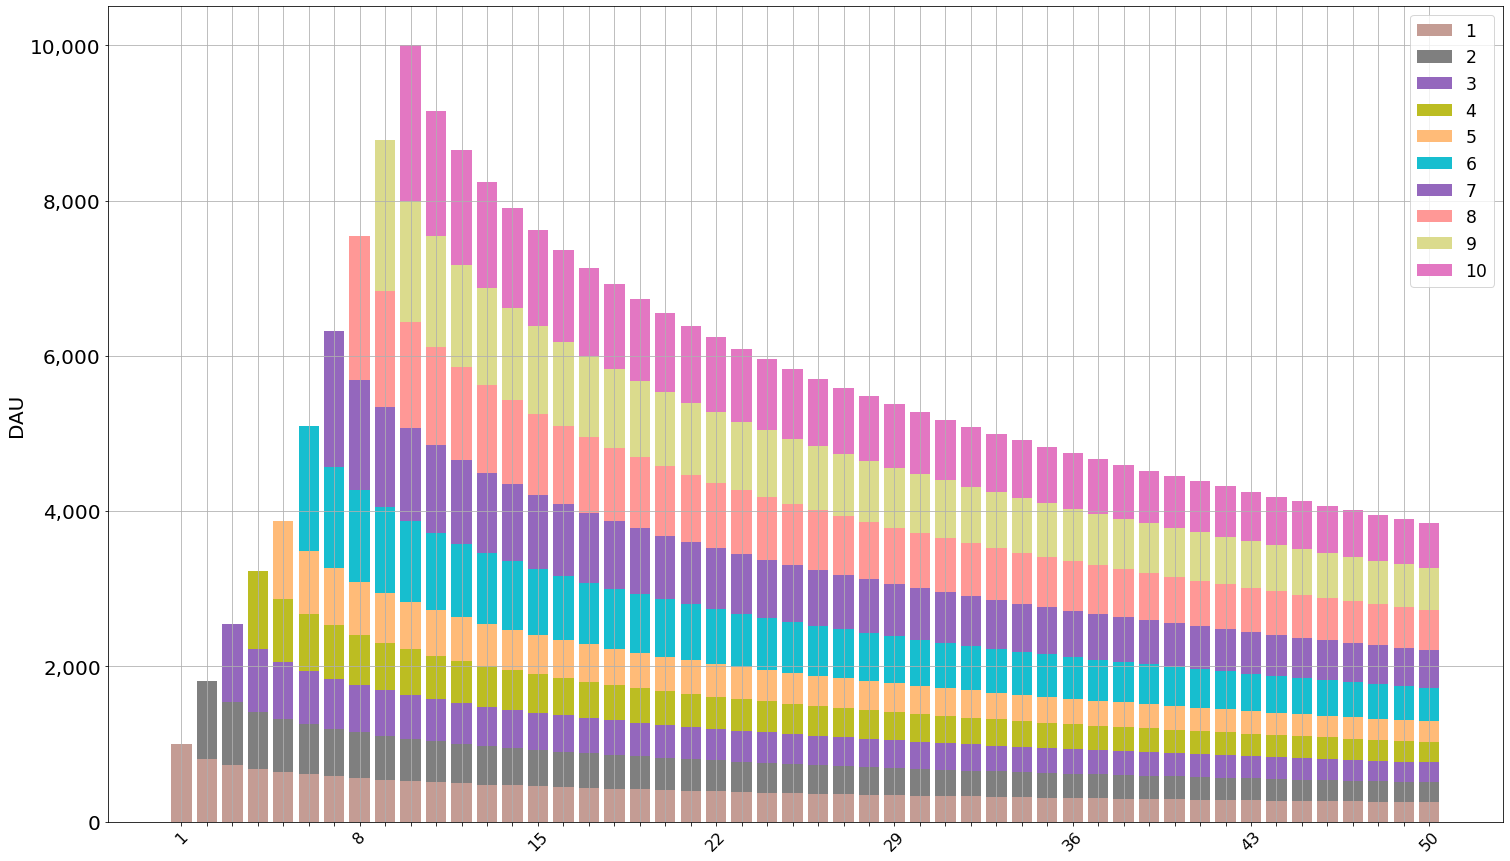

In [7]:
uba.plot_forward_DAU_stacked(
    forward_DAU=facebook_DAU,
    forward_DAU_labels=list(facebook_DAU.index),
    forward_DAU_dates=list(facebook_DAU.columns),
)

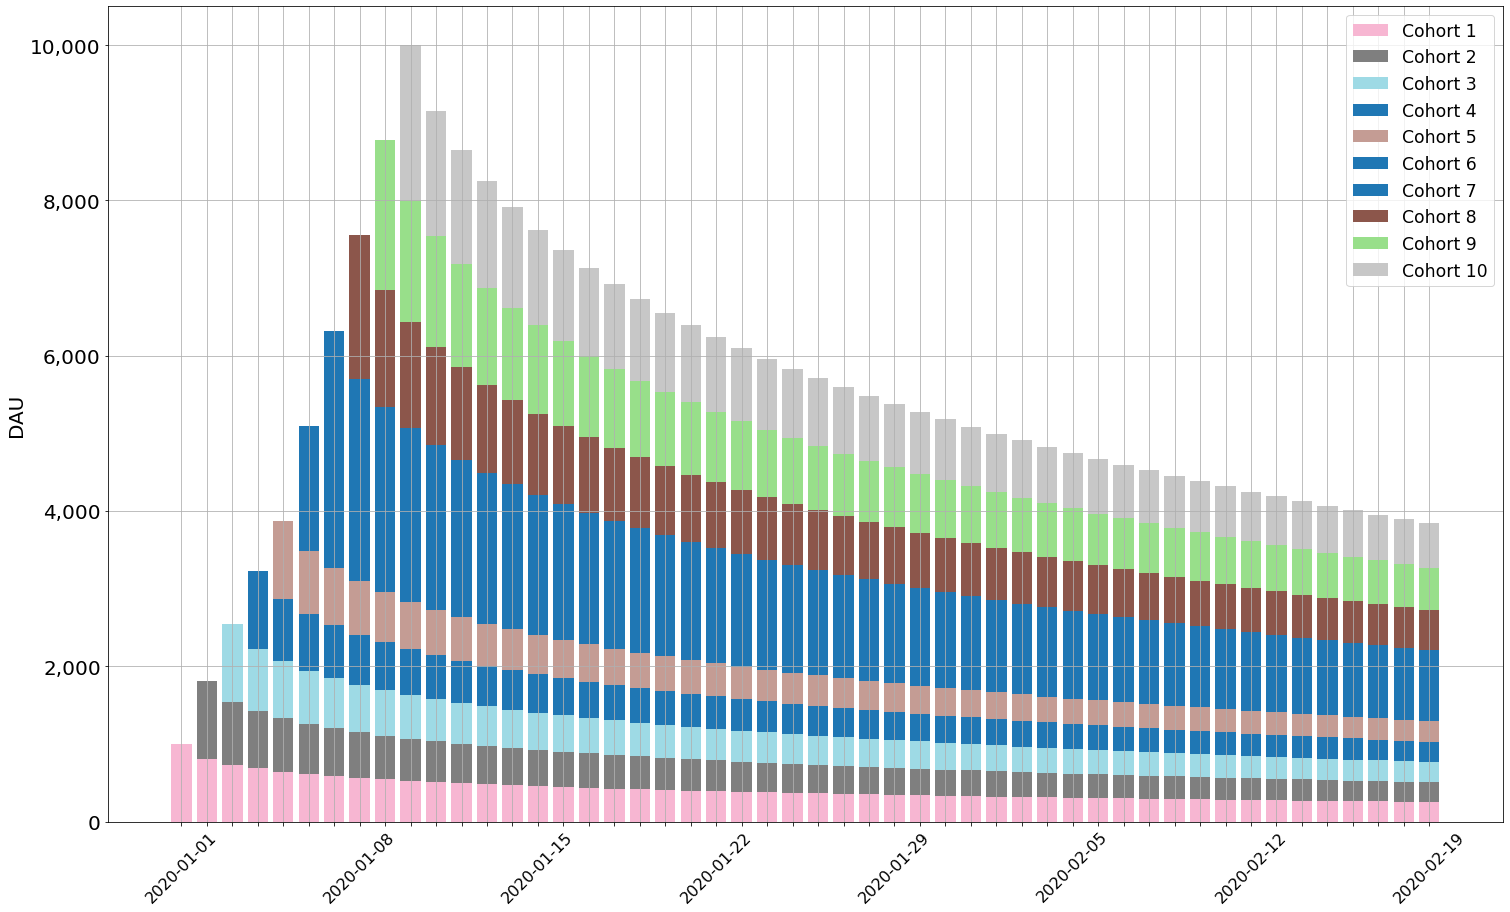

In [8]:
from datetime import date, timedelta

uba.plot_forward_DAU_stacked(
    forward_DAU=facebook_DAU,
    forward_DAU_labels=["Cohort " + str(x) for x in list(facebook_DAU.index)],
    forward_DAU_dates=[
        date(2020, 1, 1) + timedelta(days=int(x) - 1)
        for x in list(facebook_DAU.columns)
    ],
)

In [13]:
import numpy as np
import pandas as pd

path = "./input/"
df = pd.read_excel(
    path + "relay-foods.xlsx", engine="openpyxl", sheet_name="Purchase Data - Full Study"
)  # Purchase
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [14]:
df["OrderPeriod"] = df["OrderDate"].apply(lambda x: x.strftime("%Y-%m"))
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [18]:
df.set_index("UserId", inplace=True)

df["CohortGroup"] = df.groupby(level=0)["OrderDate"].min().apply(lambda x: x.strftime("%Y-%m"))
df.reset_index(inplace=True)
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [19]:
cohorts = df.groupby(["CohortGroup", "OrderPeriod"]).agg(
    {"UserId": pd.Series.nunique, "OrderId": pd.Series.nunique, "TotalCharges": np.sum}
)
cohorts.rename(columns={"UserId": "TotalUsers", "OrderId": "TotalOrders"}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30      1850.255
            2009-02               8           25      1351.065
            2009-03              10           26      1357.360
            2009-04               9           28      1604.500
            2009-05              10           26      1575.625

In [20]:
# Label the CohortPeriod for each CohortGroup
def cohort_period(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.

    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df["CohortPeriod"] = np.arange(len(df)) + 1
    return df

In [21]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22           30     1850.2550             1
            2009-02               8           25     1351.0650             2
            2009-03              10           26     1357.3600             3
            2009-04               9           28     1604.5000             4
            2009-05              10           26     1575.6250             5
...                             ...          ...           ...           ...
2010-01     2010-02              50          101     8453.1039             2
            2010-03              26           31     2238.6461             3
2010-02     2010-02             100          139     7374.7108             1
            2010-03              19           19      945.9633             2
2010-03     2010-03              24           26     1099.5471             1

[119 rows x 4 columns]

In [22]:
cohorts.reset_index(inplace=True)
cohorts.set_index(["CohortGroup", "CohortPeriod"], inplace=True)

cohort_group_size = cohorts["TotalUsers"].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

In [23]:
user_retention = cohorts["TotalUsers"].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
user_retention[["2009-06", "2009-07", "2009-08"]]

CohortGroup,2009-06,2009-07,2009-08
CohortPeriod,,,
1,1.00000,1.00,1.000000
2,0.46875,0.46,0.354839
3,0.28125,0.26,0.290323
4,0.18750,0.20,0.225806
5,0.21875,0.22,0.193548
6,0.15625,0.20,0.258065
7,0.09375,0.22,0.129032
8,0.09375,0.14,0.129032
9,0.31250,0.14,NaN


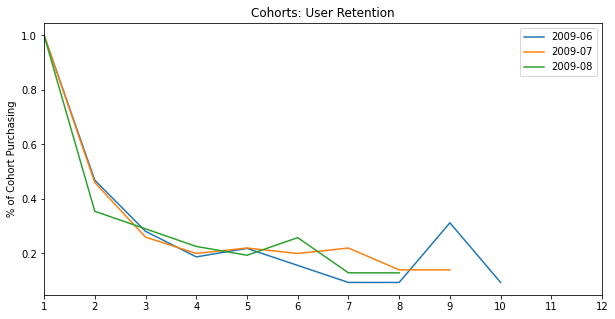

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(
    user_retention[["2009-06", "2009-07", "2009-08"]],
    label=["2009-06", "2009-07", "2009-08"],
)
plt.title("Cohorts: User Retention")
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel("% of Cohort Purchasing")
plt.legend()
plt.show()

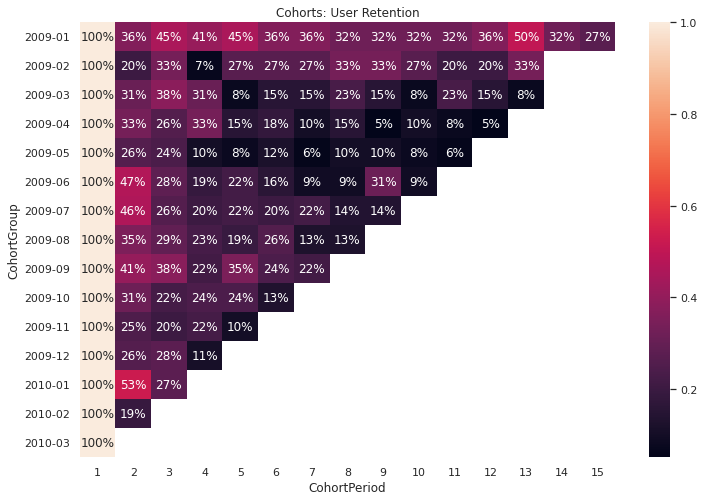

In [33]:
import seaborn as sns

sns.set(style="white")

plt.figure(figsize=(12, 8))
plt.title("Cohorts: User Retention")
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt=".0%")
plt.show()